In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [8]:
states_dict = {
        'AK': ['Alaska', 3],
        'AL': ['Alabama', 9],
        'AR': ['Arkansas', 6],
        'AZ': ['Arizona', 11],
        'CA': ['California', 55],
        'CO': ['Colorado', 9],
        'CT': ['Connecticut', 7],
        'DC': ['District of Columbia', 3],
        'DE': ['Delaware', 3],
        'FL': ['Florida', 29],
        'GA': ['Georgia', 16],
        'HI': ['Hawaii', 4],
        'IA': ['Iowa', 6],
        'ID': ['Idaho', 4],
        'IL': ['Illinois', 20],
        'IN': ['Indiana', 11],
        'KS': ['Kansas', 6],
        'KY': ['Kentucky', 8],
        'LA': ['Louisiana', 8],
        'MA': ['Massachusetts', 11],
        'MD': ['Maryland', 10],
        'ME': ['Maine', 4],
        'MI': ['Michigan', 16],
        'MN': ['Minnesota', 10],
        'MO': ['Missouri', 10],
        'MS': ['Mississippi', 6],
        'MT': ['Montana', 3],
        'NC': ['North Carolina', 15],
        'ND': ['North Dakota', 3],
        'NE': ['Nebraska', 5],
        'NH': ['New Hampshire', 4],
        'NJ': ['New Jersey', 14],
        'NM': ['New Mexico', 5],
        'NV': ['Nevada', 6],
        'NY': ['New York', 29],
        'OH': ['Ohio', 18],
        'OK': ['Oklahoma', 7],
        'OR': ['Oregon', 7],
        'PA': ['Pennsylvania', 20],
        'RI': ['Rhode Island', 4],
        'SC': ['South Carolina', 9],
        'SD': ['South Dakota', 3],
        'TN': ['Tennessee', 11],
        'TX': ['Texas' ,38],
        'UT': ['Utah', 6],
        'VA': ['Virginia', 13],
        'VT': ['Vermont', 3],
        'WA': ['Washington', 12],
        'WI': ['Wisconsin', 10],
        'WV': ['West Virginia', 5],
        'WY': ['Wyoming', 3]
}

In [9]:
df = pd.read_csv('../data/processed/data from 2004 to 2016.csv')
df = df.drop('last_election', axis=1)

In [10]:
df_train = df[df.year != 2016].drop('year', axis=1)
df_test = df[df.year == 2016].drop('year', axis=1)

In [11]:
df_train.head()

,state,female_black_adult,female_black_elder,female_other_adult,female_other_elder,female_white_adult,female_white_elder,male_black_adult,male_black_elder,male_other_adult,male_other_elder,male_white_adult,male_white_elder,dem_lower,dem_higher,gop_lower,gop_higher,winner
0,AK,0.013745,0.002134,0.098324,0.022630,0.268684,0.074948,0.016521,0.002260,0.097007,0.019091,0.302127,0.082530,0.33,0.38,0.62,0.67,1
1,AL,0.103038,0.033192,0.009598,0.002488,0.242872,0.131649,0.088996,0.022915,0.009401,0.001990,0.247232,0.106630,0.36,0.43,0.57,0.63,1
2,AR,0.059990,0.017814,0.011884,0.003054,0.272915,0.150283,0.054186,0.012708,0.011303,0.002490,0.279410,0.123963,0.44,0.50,0.50,0.56,1
3,AZ,0.013103,0.003048,0.035803,0.007955,0.298892,0.146573,0.015161,0.002803,0.034379,0.006073,0.310142,0.126068,0.42,0.48,0.52,0.57,1
4,CA,0.026222,0.008076,0.067356,0.020129,0.274694,0.109844,0.026014,0.006324,0.063050,0.016015,0.290776,0.091500,0.52,0.58,0.42,0.48,0


In [13]:
# Non-numerical columns in the dataset
non_numeric = ['state',  'winner']

# Drop the non-numerical columns from df
df_numeric = df_train.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(152, 2)


In [14]:
cor_mat = df_numeric.corr().abs()
cor_mat.style.background_gradient(cmap='coolwarm')

,female_black_adult,female_black_elder,female_other_adult,female_other_elder,female_white_adult,female_white_elder,male_black_adult,male_black_elder,male_other_adult,male_other_elder,male_white_adult,male_white_elder,dem_lower,dem_higher,gop_lower,gop_higher
female_black_adult,1.000000,0.966029,0.212481,0.171583,0.595068,0.457809,0.999172,0.969709,0.221649,0.172617,0.642023,0.559225,0.095608,0.098719,0.102707,0.109330
female_black_elder,0.966029,1.000000,0.189786,0.155903,0.595133,0.467607,0.962414,0.998202,0.202631,0.158557,0.642049,0.551823,0.149923,0.152475,0.155942,0.165122
female_other_adult,0.212481,0.189786,1.000000,0.969274,0.595835,0.603500,0.201352,0.186647,0.999384,0.969893,0.516308,0.505806,0.237840,0.227341,0.227490,0.233153
female_other_elder,0.171583,0.155903,0.969274,1.000000,0.637038,0.564101,0.161872,0.151543,0.969425,0.999710,0.574741,0.485611,0.248431,0.237375,0.235931,0.241542
female_white_adult,0.595068,0.595133,0.595835,0.637038,1.000000,0.656452,0.604081,0.605931,0.589463,0.635990,0.983928,0.648417,0.304950,0.302080,0.304165,0.311710
female_white_elder,0.457809,0.467607,0.603500,0.564101,0.656452,1.000000,0.464526,0.464843,0.596120,0.563922,0.587731,0.961985,0.076582,0.066316,0.069461,0.082832
male_black_adult,0.999172,0.962414,0.201352,0.161872,0.604081,0.464526,1.000000,0.967568,0.210383,0.162990,0.648443,0.563886,0.092005,0.095215,0.099163,0.105846
male_black_elder,0.969709,0.998202,0.186647,0.151543,0.605931,0.464843,0.967568,1.000000,0.199232,0.154356,0.651398,0.545887,0.139083,0.141751,0.145387,0.153965
male_other_adult,0.221649,0.202631,0.999384,0.969425,0.589463,0.596120,0.210383,0.199232,1.000000,0.970519,0.508671,0.497826,0.221684,0.211274,0.211263,0.216948
male_other_elder,0.172617,0.158557,0.969893,0.999710,0.635990,0.563922,0.162990,0.154356,0.970519,1.000000,0.573661,0.485730,0.246842,0.235711,0.234272,0.240116


In [15]:
mask = np.triu(np.ones_like(cor_mat, dtype=bool))

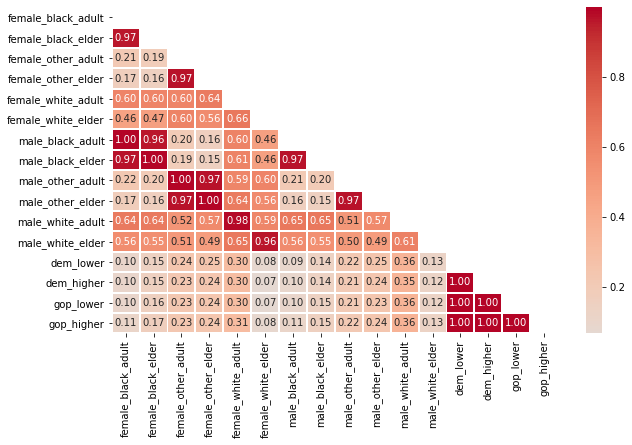

In [16]:
# Add the mask to the heatmap
plt.subplots(figsize = (10,6))
sns.heatmap(cor_mat, mask=mask, cmap='coolwarm', center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [17]:
# Calculate the correlation matrix and take the absolute value

# Create a True/False mask and apply it
tri_df = cor_mat.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = df_train.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The reduced dataframe has 7 columns.


In [18]:
reduced_df.head()

,state,male_black_elder,male_other_elder,male_white_adult,male_white_elder,gop_higher,winner
0,AK,0.002260,0.019091,0.302127,0.082530,0.67,1
1,AL,0.022915,0.001990,0.247232,0.106630,0.63,1
2,AR,0.012708,0.002490,0.279410,0.123963,0.56,1
3,AZ,0.002803,0.006073,0.310142,0.126068,0.57,1
4,CA,0.006324,0.016015,0.290776,0.091500,0.48,0


In [19]:
X_train = reduced_df.drop('winner', axis=1)
X_train = pd.get_dummies(X_train)
y_train = reduced_df['winner']
reduced_test = df_test.drop(to_drop, axis=1)
X_test = reduced_test.drop('winner', axis=1)
X_test = pd.get_dummies(X_test)
y_test = reduced_test['winner']

In [20]:
state_df = pd.DataFrame.from_dict(states_dict, orient='index').reset_index()

In [21]:
state_df.columns = ['state', 'name', 'votes']


In [22]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    print ("-"*20," "*5, "ACCUARACY SCORE", " "*5, "-"*20)
    print(" "*10, "Accuracy score for model is : ", round(accuracy_score(test_y, predict_y),4))
    print ("-"*69)
    
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()
    
    
def print_report(test_y, test_predict):
    from sklearn.metrics import confusion_matrix
    
    
    print(confusion_matrix(test_y, test_predict))

    from sklearn.metrics import classification_report
    print(classification_report(test_y, test_predict))
    
def plot_roc(test_y, test_probs):
    fpr, tpr, threshold = roc_curve(test_y, test_probs)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

--------------------       ACCUARACY SCORE       --------------------
           Accuracy score for model is :  0.8824
---------------------------------------------------------------------


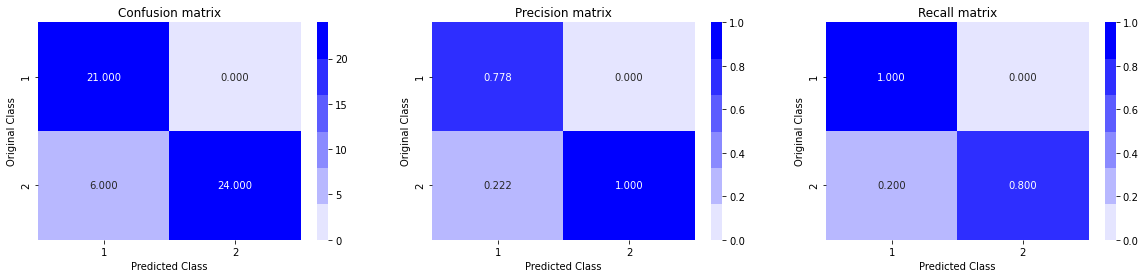

[[21  0]
 [ 6 24]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           1       1.00      0.80      0.89        30

    accuracy                           0.88        51
   macro avg       0.89      0.90      0.88        51
weighted avg       0.91      0.88      0.88        51



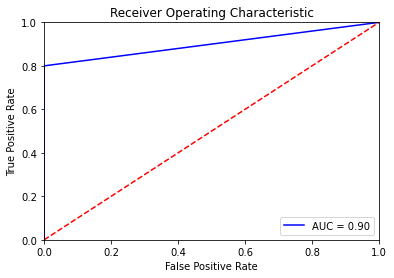

In [23]:
lr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_predict)
plot_confusion_matrix(y_test, lr_predict)
print_report(y_test, lr_predict)
plot_roc(y_test, lr_predict)

--------------------       ACCUARACY SCORE       --------------------
           Accuracy score for model is :  0.8824
---------------------------------------------------------------------


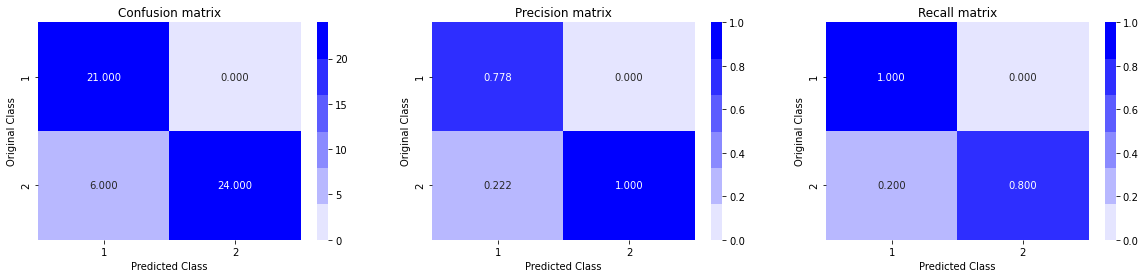

[[21  0]
 [ 6 24]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           1       1.00      0.80      0.89        30

    accuracy                           0.88        51
   macro avg       0.89      0.90      0.88        51
weighted avg       0.91      0.88      0.88        51



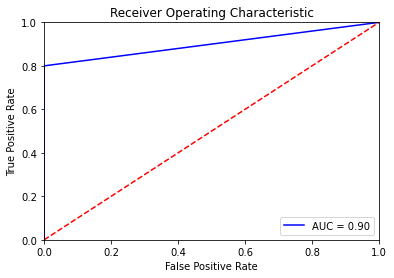

In [24]:
rf = RandomForestClassifier(max_features=10, n_estimators = 50)
# rf = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predict)
plot_confusion_matrix(y_test, rf_predict)
print_report(y_test, rf_predict)
plot_roc(y_test, rf_predict)

--------------------       ACCUARACY SCORE       --------------------
           Accuracy score for model is :  0.8824
---------------------------------------------------------------------


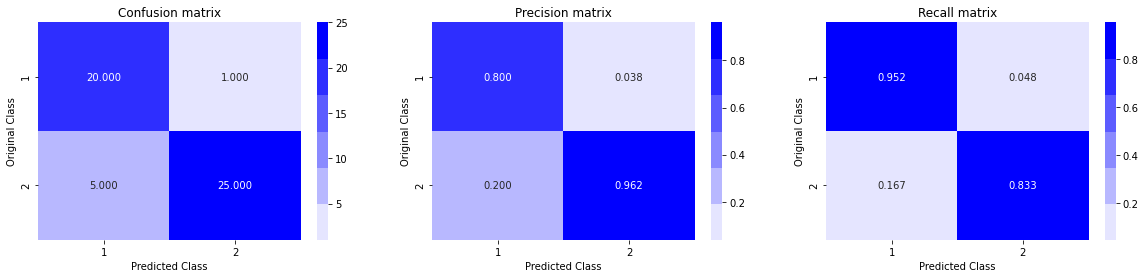

[[20  1]
 [ 5 25]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.96      0.83      0.89        30

    accuracy                           0.88        51
   macro avg       0.88      0.89      0.88        51
weighted avg       0.90      0.88      0.88        51



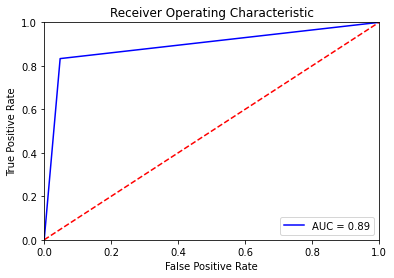

In [25]:
xgb = XGBClassifier()
# xgb = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_predict)
plot_confusion_matrix(y_test, xgb_predict)
print_report(y_test, xgb_predict)
plot_roc(y_test, xgb_predict)

In [26]:
state_df['lr_predict'], state_df['rf_predict'], state_df['xgb_predict'],  state_df['actual'] = [lr_predict, rf_predict, xgb_predict, y_test.values]

In [27]:
state_df

,state,name,votes,lr_predict,rf_predict,xgb_predict,actual
0,AK,Alaska,3,1,1,1,1
1,AL,Alabama,9,1,1,1,1
2,AR,Arkansas,6,1,1,1,1
3,AZ,Arizona,11,1,1,1,1
4,CA,California,55,0,0,0,0
5,CO,Colorado,9,0,0,0,0
6,CT,Connecticut,7,0,0,0,0
7,DC,District of Columbia,3,0,0,1,0
8,DE,Delaware,3,0,0,0,0
9,FL,Florida,29,0,0,0,1
